# Flight delays greater than 10 minutes

In this file I am going to create a prediction model in order to predict which is the probability that the departure delays are greater than 10 minutes depending on the weather conditions. 

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

### Cleaning operations

In [2]:
flights = pd.read_csv("../cleaned_data/weather_imp.csv")

In [3]:
flights.shape

(120955, 21)

In [4]:
#first of all I am going to delete the early departure since I want explicitly to analyse the delays
#higher or lower than 10 minutes
#flights = flights.loc[flights.dep_delay >= 0].copy()

In [4]:
flights

,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,...,wind_speed,wind_gust,visib,month,day,hour,wind_speed_group,visib_group,wind_dir_group,airline
0,193,182.0,UA,1537,N54711,EWR,MIA,148.0,1085,2017-10-01T21:00:00Z,...,8.05546,9.270062,10.0,10,1,21,0 - 25,greater than 8,less than 200,United Air Lines Inc.
1,733,708.0,DL,2925,N882DN,JFK,SJU,190.0,1598,2017-10-01T17:00:00Z,...,8.05546,9.270062,10.0,10,1,17,0 - 25,greater than 8,greater than 200,Delta Air Lines Inc.
2,0,5.0,AA,1572,N3NSAA,JFK,PHX,293.0,2153,2017-10-01T06:00:00Z,...,17.26170,19.864419,10.0,10,1,6,0 - 25,greater than 8,greater than 200,American Airlines Inc.
3,33,33.0,UA,1483,N502UA,EWR,SFO,335.0,2565,2017-10-01T06:00:00Z,...,16.11092,18.540125,10.0,10,1,6,0 - 25,greater than 8,greater than 200,United Air Lines Inc.
4,1,-6.0,AA,1508,N3CWAA,JFK,CLT,83.0,541,2017-10-01T06:00:00Z,...,17.26170,19.864419,10.0,10,1,6,0 - 25,greater than 8,greater than 200,American Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120950,1,-4.0,B6,483,N972JB,JFK,MCO,130.0,944,2017-09-30T21:00:00Z,...,15.53553,17.877977,10.0,9,30,21,0 - 25,greater than 8,greater than 200,JetBlue Airways
120951,0,0.0,B6,127,N729JB,EWR,MCO,129.0,937,2017-09-30T21:00:00Z,...,16.11092,18.540125,10.0,9,30,21,0 - 25,greater than 8,greater than 200,JetBlue Airways
120952,3,-9.0,F9,509,N238FR,LGA,DEN,213.0,1620,2017-09-30T22:00:00Z,...,13.80936,15.891535,10.0,9,30,22,0 - 25,greater than 8,greater than 200,Frontier Airlines Inc.
120953,2,-10.0,B6,718,N296JB,JFK,BOS,37.0,187,2017-09-30T23:00:00Z,...,16.11092,18.540125,10.0,9,30,23,0 - 25,greater than 8,greater than 200,JetBlue Airways


In [4]:
flights["dep_delay_10"] = np.where(flights.dep_delay <= 10, 0, 1)
(
flights.drop(columns = ["dep_delay", "flight", "tailnum", "arr_delay",
                        "time_hour", "wind_gust", "day", "wind_speed_group", "visib_group", "wind_dir_group", "airline",
                        "carrier", "dest", "air_time", "distance"], inplace = True)
)

In [5]:
flights.describe

<bound method NDFrame.describe of        origin    wind_dir  wind_speed  visib  month  hour  dep_delay_10
0         EWR   10.000000     8.05546   10.0     10    21             1
1         JFK  360.000000     8.05546   10.0     10    17             1
2         JFK  350.000000    17.26170   10.0     10     6             0
3         EWR  350.000000    16.11092   10.0     10     6             1
4         JFK  350.000000    17.26170   10.0     10     6             0
...       ...         ...         ...    ...    ...   ...           ...
120950    JFK  330.833333    15.53553   10.0      9    21             0
120951    EWR  330.000000    16.11092   10.0      9    21             0
120952    LGA  340.000000    13.80936   10.0      9    22             0
120953    JFK  330.000000    16.11092   10.0      9    23             0
120954    JFK  340.000000    14.96014   10.0      9    22             1

[120955 rows x 7 columns]>

In [6]:
flights.isna().sum()

origin          0
wind_dir        0
wind_speed      0
visib           0
month           0
hour            0
dep_delay_10    0
dtype: int64

In [104]:
#since I am going to create a prediction model I must delete all the NAs
#flights.dropna(inplace = True)
#flights.isna().sum()
#flights.shape

(120955, 7)

In [10]:
#ProfileReport(flights)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
flights

,origin,wind_dir,wind_speed,visib,month,hour,dep_delay_10
0,EWR,10.000000,8.05546,10.0,10,21,1
1,JFK,360.000000,8.05546,10.0,10,17,1
2,JFK,350.000000,17.26170,10.0,10,6,0
3,EWR,350.000000,16.11092,10.0,10,6,1
4,JFK,350.000000,17.26170,10.0,10,6,0
...,...,...,...,...,...,...,...
120950,JFK,330.833333,15.53553,10.0,9,21,0
120951,EWR,330.000000,16.11092,10.0,9,21,0
120952,LGA,340.000000,13.80936,10.0,9,22,0
120953,JFK,330.000000,16.11092,10.0,9,23,0


In [7]:
# I am going to create dummy variables for the categorical columns
flights = pd.get_dummies(flights, drop_first = True)
flights.head()

,wind_dir,wind_speed,visib,month,hour,dep_delay_10,origin_JFK,origin_LGA
0,10.0,8.05546,10.0,10,21,1,0,0
1,360.0,8.05546,10.0,10,17,1,1,0
2,350.0,17.26170,10.0,10,6,0,1,0
3,350.0,16.11092,10.0,10,6,1,0,0
4,350.0,17.26170,10.0,10,6,0,1,0


In [8]:
#Here I set my predictors and response variables.

delay_pred = flights.drop(columns = "dep_delay_10")

delay_resp = flights["dep_delay_10"]

In [9]:
#Now I am going to split the dataset in training and testing set
from sklearn.model_selection import train_test_split

In [10]:
delay_pred_train, delay_pred_test, delay_resp_train, delay_resp_test = (
    train_test_split(
        delay_pred,
        delay_resp,
        test_size = 0.2,
        random_state = 3
    )
)

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# run the model with 100 trees
model_3 = RandomForestClassifier(n_estimators = 50)

# train the model on the training data
model_3.fit(delay_pred_train, delay_resp_train)

RandomForestClassifier(n_estimators=50)

In [12]:
#very long time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_3, delay_pred_train, delay_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.6288702274452838

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_3, delay_pred_train, delay_resp_train, scoring='f1', cv=10
)
np.mean(scores)

0.7184916481518973

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_3, delay_pred_train, delay_resp_train, scoring='average_precision', cv=10
)
np.mean(scores)

0.7317889816840052

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [15]:
%matplotlib inline

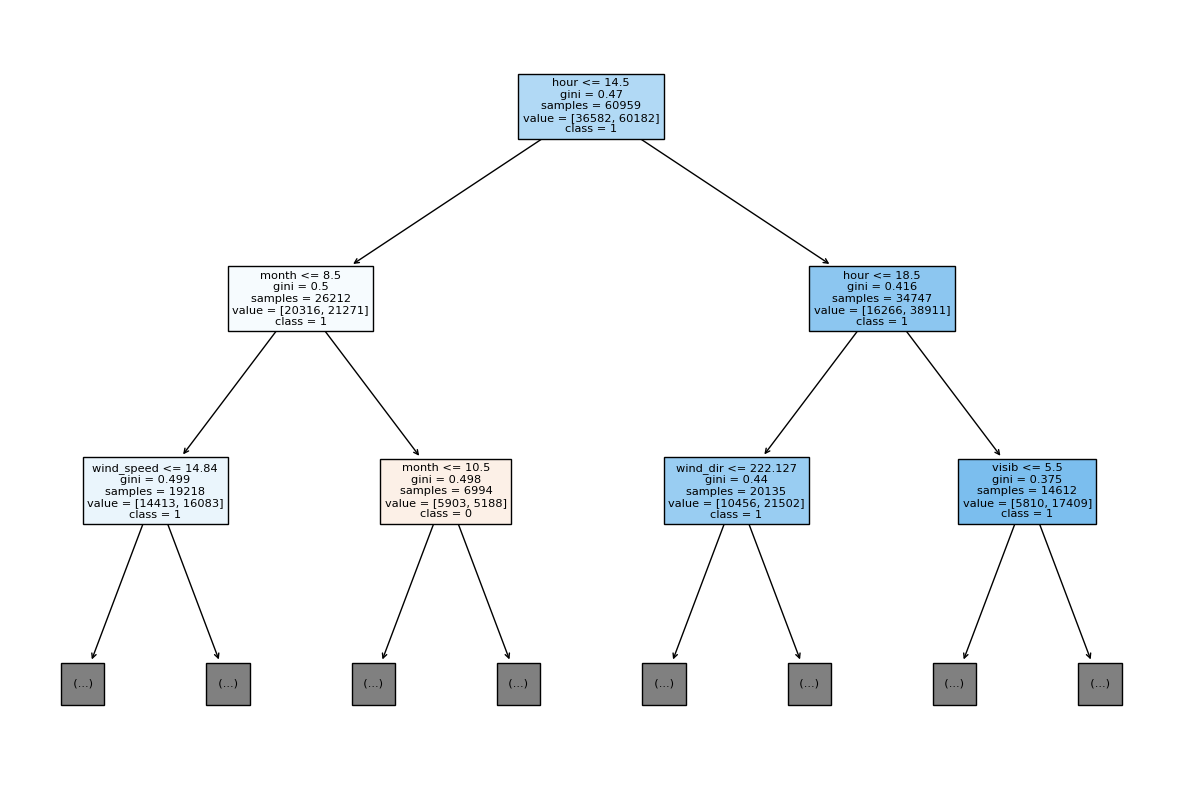

In [16]:
# create a list with names of predictors, and an array with target categories for plotting
delay_pred_names = list(delay_pred_test)
delay_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
tree = plot_tree(model_3.estimators_[3],
          max_depth = 2,
          feature_names = delay_pred_names,
          class_names = delay_resp_names, 
          filled=True)
tree

plt.savefig("tree.png")

In [17]:
# Get numerical feature importances
importances = list(model_3.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(delay_pred_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: wind_dir                                 Importance: 0.27
Variable: hour                                     Importance: 0.26
Variable: wind_speed                               Importance: 0.23
Variable: month                                    Importance: 0.16
Variable: visib                                    Importance: 0.04
Variable: origin_JFK                               Importance: 0.02
Variable: origin_LGA                               Importance: 0.02


## 20 minutes

In [18]:
flights_25 = pd.read_csv("../cleaned_data/weather_imp.csv")
flights_25["dep_delay_25"] = np.where(flights_25.dep_delay <= 20, 0, 1)
(
flights_25.drop(columns = ["dep_delay", "flight", "tailnum", "arr_delay",
                        "time_hour", "wind_gust", "day", "wind_speed_group", "visib_group", "wind_dir_group", "airline",
                        "carrier", "dest", "air_time", "distance"], inplace = True)
)

In [19]:
flights_25 = pd.get_dummies(flights_25, drop_first = True)
flights_25.head()
delay_pred_25 = flights_25.drop(columns = "dep_delay_25")

delay_resp_25 = flights_25["dep_delay_25"]

from sklearn.model_selection import train_test_split

delay_pred_train_25, delay_pred_test_25, delay_resp_train_25, delay_resp_test_25 = (
    train_test_split(
        delay_pred_25,
        delay_resp_25,
        test_size = 0.2,
        random_state = 3
    )
)


In [20]:
from sklearn.ensemble import RandomForestClassifier

# run the model with 100 trees
model_25 = RandomForestClassifier(n_estimators = 50)

# train the model on the training data
model_25.fit(delay_pred_train_25, delay_resp_train_25)

RandomForestClassifier(n_estimators=50)

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_25, delay_pred_train_25, delay_resp_train_25, scoring='accuracy', cv=10
)
np.mean(scores)

0.6138544008258824

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_25, delay_pred_train_25, delay_resp_train_25, scoring='f1', cv=10
)
np.mean(scores)

0.600066477476412

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_25, delay_pred_train_25, delay_resp_train_25, scoring='average_precision', cv=10
)
np.mean(scores)

0.6325171654652553

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

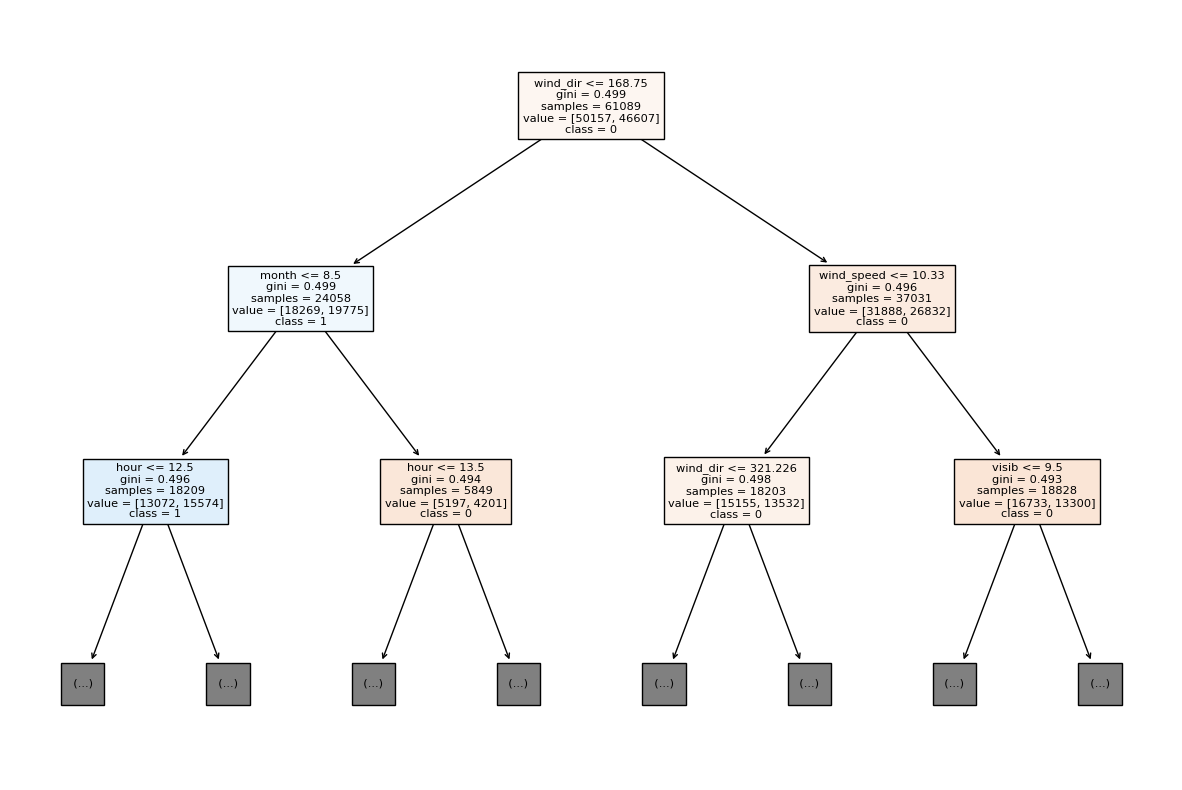

In [28]:
delay_pred_names_25 = list(delay_pred_test_25)
delay_resp_names_25 = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
tree = plot_tree(model_25.estimators_[34],
          max_depth = 2,
          feature_names = delay_pred_names,
          class_names = delay_resp_names, 
          filled=True)
tree

plt.savefig("tree_20.png")

In [24]:
# Get numerical feature importances
importances_25 = list(model_25.feature_importances_)

# List of tuples with variable and importance
feature_importances_25 = [(feature, round(importance, 2)) for feature, importance in zip(delay_pred_names_25, importances_25)]

# Sort the feature importances by most important first
feature_importances_25 = sorted(feature_importances_25, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances_25];

Variable: hour                                     Importance: 0.27
Variable: wind_dir                                 Importance: 0.26
Variable: wind_speed                               Importance: 0.23
Variable: month                                    Importance: 0.16
Variable: visib                                    Importance: 0.05
Variable: origin_JFK                               Importance: 0.02
Variable: origin_LGA                               Importance: 0.02


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [31]:
model_2 = LogisticRegression()
model_2.fit(delay_pred_train, delay_resp_train)
scores = cross_val_score(
    model_2, delay_pred_train, delay_resp_train, scoring='accuracy', cv=15
)
np.mean(scores)

C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.639700747074848

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_2, delay_pred_train, delay_resp_train, scoring='f1', cv=10
)
np.mean(scores)

C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.7474632569956747

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_2, delay_pred_train, delay_resp_train, scoring='average_precision', cv=10
)
np.mean(scores)

C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.7312234105175496

In [19]:
print(model_2.score(delay_pred_train, delay_resp_train))
print(np.mean(scores))

0.6393080071100823
0.639700747074848


In [20]:
model_2.score(delay_pred_test, delay_resp_test)

0.6393286759538671

In [21]:
pred_test = model_2.predict_proba(delay_pred_test)
pred_test

array([[0.37778886, 0.62221114],
       [0.24751998, 0.75248002],
       [0.47771138, 0.52228862],
       ...,
       [0.57436858, 0.42563142],
       [0.33920901, 0.66079099],
       [0.41396808, 0.58603192]])

In [22]:
#I just want the probabilities of the positive outcome 
pred_test = pred_test[:, 1]
pred_test

array([0.62221114, 0.75248002, 0.52228862, ..., 0.42563142, 0.66079099,
       0.58603192])

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = delay_resp_test, y_score = pred_test)

0.6376781883955208